In [12]:
import numpy as np
import json

import os
import sys
sys.path.append('../../solvers/')
sys.path.append('../../src/')

from helper_functions import prettify_results, get_hyperparameter_list, read_process_results, analyze_data, read_results

import pdb
import pandas as pd

import matplotlib as mpl
from matplotlib import rcParams
mpl.rc('text', usetex=True)
mpl.rc('font', family='serif')
mpl.rc('xtick', labelsize=15)
mpl.rc('ytick', labelsize=15)
mpl.rc('axes', labelsize=14)
mpl.rc('axes', titlesize=14)
mpl.rc('figure', figsize=(6, 4))

In [13]:

savedir = './'
filename = 'blasius_kridge_hyper_noise.json'
filters = {'params.kernel': 'rbf'}
sortby = 'params.noise_amp'
pickcols = ['x_list', 'loss_list', 'params.noise_amp']
dataframe = read_process_results(filename=filename, savedir=savedir, filters=filters, sortby=sortby, pickcols=pickcols)
dataframe
# dataframe = dataframe.drop(4)

,x_list,loss_list,params.noise_amp
4,"[[1.1155238584235556, -0.09890357535366752, 1....","[0.0032477384647060033, 0.0013339406067250418,...",0.000000
9,"[[0.7561657768394058, 0.4271046383712968, 1.18...","[0.0035498696890887372, None, 0.00502742811647...",0.000001
6,"[[-0.16813236320566738, 0.3495636751634687, 0....","[0.0010745988337489219, 0.0010754215338051683,...",0.000010
12,"[[0.8168587182810426, 0.2731733894794792, 1.09...","[0.0032701482192682954, 0.0029350854175496837,...",0.000050
7,"[-1, [-0.16782377029707604, 0.3461579213409524...","[None, 0.0011010967090396959, 0.00109509971222...",0.000100
15,"[[1.0308964903247542, -0.03896231602016097, 0....","[0.003053769655255602, 0.0029116483363869666, ...",0.000500
3,"[[-0.1708205619400367, 0.35309770947736974, 0....","[0.0010286699755609708, None, 0.00102874999781...",0.001000
18,"[[4.095989682797464, -5.234766744201445, -1.13...","[0.011621455154628587, 0.0034409443445688193, ...",0.005000
5,"[[0.3727762964553565, -0.7633854041263322, -0....","[0.003522989076329059, 0.0018576307438620565, ...",0.010000
11,"[[0.2581570495961646, -0.5407676766438057, -0....","[0.014478349023304539, 0.01639790489462253, 0....",0.050000


In [14]:
dataframe = analyze_data(dataframe)
dataframe = dataframe.drop([17, 4])
dataframe[['params.noise_amp', 'x_norm', 'error_sol', 'error_opt', 'error_mean', 'error_std', 'num_net', 'loss_opt']]


,params.noise_amp,x_norm,error_sol,error_opt,error_mean,error_std,num_net,loss_opt
9,0.000001,"[[1.77044618321856, 1.0, 2.77044618321856, -2....",0.027328,0.029434,0.679145,1.454957,6,0.001065
6,0.000010,"[[-0.4809777878866921, 1.0, 0.5190222121133092...",0.032947,0.033226,0.033087,0.000139,2,0.001073
12,0.000050,"[[2.9902572861783265, 1.0, 3.9902572861783265,...",0.008732,0.027335,1.227378,2.408974,5,0.001010
7,0.000100,"[[-0.48481851764927825, 1.0, 0.515181482350721...",0.026144,0.027274,0.026685,0.000464,6,0.001080
15,0.000500,"[[-26.458809322097768, 1.0, -25.45880932209776...",0.029487,0.036365,9.019893,17.971042,5,0.001963
3,0.001000,"[[-0.48377703212199596, 1.0, 0.516222967878004...",0.026701,0.026701,0.027891,0.000766,6,0.001020
18,0.005000,"[[-0.7824588721808082, 1.0, 0.2175411278191917...",0.036005,0.036669,1.093252,1.895670,5,0.001369
5,0.010000,"[[-0.4883199160481538, 1.0, 0.5116800839518462...",0.020230,0.033005,0.029287,0.005246,4,0.001849
11,0.050000,"[[-0.4773899416444008, 1.0, 0.5226100583555993...",0.037948,9.634038,6.610052,9.570967,6,0.003033
2,0.100000,"[[-0.5992660777597396, 1.0, 0.4007339222402604...",0.171934,5.403382,3.595780,4.537452,6,0.003019


In [60]:
true_value=[-.5, 1, .5, -.5]
savedir = './'
filename = 'blasius_buckinet_hyper_noise.json'
buckinet_data = read_results(filename, savedir)
b_dataframe = pd.json_normalize(buckinet_data, max_level=1)
b_dataframe = b_dataframe[['x', 'loss', 'params.noise_amp', 'params.l2_reg']]
b_dataframe = b_dataframe.sort_values(by='params.noise_amp')
b_dataframe = b_dataframe.drop([14, 9, 32, 31, 23, 8, 21])
# b_dataframe = b_dataframe.drop([4, 19, 21, 20, 24, 17, 15, 8, 13, 5, 30])
b2_dataframe = b_dataframe[b_dataframe['params.l2_reg'] == 0.000001]
b_dataframe = b_dataframe[b_dataframe['params.l2_reg'] == 0.0]

def add_results(df):
    df['x_opt']         = df['x'].apply(lambda x: np.array(x[0]))
    df['final_loss']    = df['loss'].apply(lambda x: x[0])
    df['final_mse']     = df['loss'].apply(lambda x: x[1])

    df['x_opt_norm']    = df.apply(lambda row: row.x_opt/row.x_opt[1], axis=1)
    df['error_opt']     = df.apply(lambda row: np.linalg.norm(row.x_opt_norm - true_value, ord=2), axis=1) 
    df['error_mean']    = df.apply(lambda row: np.mean(np.linalg.norm(row.x_opt_norm - np.array(true_value), ord=2) ), axis=1) 
    df['error_std']     = df.apply(lambda row: np.std(np.linalg.norm(row.x_opt_norm - np.array(true_value), ord=2) ), axis=1) 
    
    return df

b2_dataframe = add_results(b2_dataframe)
b_dataframe = add_results(b_dataframe)
display(b_dataframe[['x_opt_norm', 'params.noise_amp', 'final_mse', 'error_opt']])
display(b2_dataframe[['x_opt_norm', 'params.noise_amp', 'final_mse', 'error_opt']])

,x_opt_norm,params.noise_amp,final_mse,error_opt
4,"[-0.10886429157413362, 1.0, 0.0456209869709107...",0.000001,9.222609,1.316726
18,"[-0.4869500233056616, 1.0, 0.5132169320694128,...",0.000010,0.005541,0.022726
0,"[-0.48494276633222794, 1.0, 0.5152124984893828...",0.000100,0.005381,0.026355
20,"[-0.4844306358438792, 1.0, 0.513541985333033, ...",0.000500,0.016007,0.024604
24,"[-0.48514249515692665, 1.0, 0.5109642304930297...",0.001000,0.005915,0.022012
30,"[-0.4838691248241396, 1.0, 0.5168927373926915,...",0.005000,0.010495,0.028758
25,"[-0.4802098991170285, 1.0, 0.5202944726316777,...",0.010000,0.010796,0.035052
16,"[-0.4850113414961055, 1.0, 0.49754039767251895...",0.050000,0.059299,0.015247
12,"[-0.5288252633669533, 1.0, 0.466751681747289, ...",0.100000,0.104143,0.052416
22,"[-0.5333784437859255, 1.0, 0.46561218162762097...",0.500000,0.552645,0.058256


,x_opt_norm,params.noise_amp,final_mse,error_opt
11,"[-0.48172037771960746, 1.0, 0.5187045756200408...",0.000001,0.004847,0.031981
2,"[-0.4792509003067506, 1.0, 0.5202600291600704,...",0.000010,0.002279,0.035373
27,"[-0.48234249043759764, 1.0, 0.5170271733893728...",0.000050,0.004524,0.029488
26,"[-0.48355121002906765, 1.0, 0.5152233061829921...",0.000500,0.003294,0.027410
1,"[-0.48291009422911363, 1.0, 0.5168878304466142...",0.001000,0.003134,0.029563
28,"[-0.47947083516484434, 1.0, 0.5205654988074092...",0.005000,0.007071,0.035888
17,"[-0.496648848797535, 1.0, 0.5015499341303833, ...",0.050000,0.050558,0.004414
10,"[-0.4311276861457718, 1.0, 0.5592953993104024,...",0.100000,0.106368,0.109628
19,"[-1.3530552646716125, 1.0, -2.960790310757203,...",0.500000,0.558577,4.230247
33,"[-0.6714108163417589, 1.0, 0.502341782432267, ...",1.000000,1.043143,0.180544


In [69]:
# b_dataframe[b_dataframe['params.noise_amp'] == 0.000001] = b2_dataframe[b2_dataframe['params.noise_amp'] == 0.000001]
# b_dataframe

,x,loss,params.noise_amp,params.l2_reg,x_opt,final_loss,final_mse,x_opt_norm,error_opt,error_mean,error_std
4,"[[0.25989601016044617, -0.5395163297653198, -0...","[4.0337807149626315e-05, 0.004846547264605761]",0.000001,0.000001,"[0.25989601016044617, -0.5395163297653198, -0....",0.000040,0.004847,"[-0.48172037771960746, 1.0, 0.5187045756200408...",0.031981,0.031981,0.0
18,"[[-0.32822078466415405, 0.6740338206291199, 0....","[3.070155071327463e-05, 0.005540595855563879]",0.000010,0.000000,"[-0.32822078466415405, 0.6740338206291199, 0.3...",0.000031,0.005541,"[-0.4869500233056616, 1.0, 0.5132169320694128,...",0.022726,0.022726,0.0
0,"[[-0.34729039669036865, 0.7161471843719482, 0....","[2.9013195671723224e-05, 0.0053808437660336494]",0.000100,0.000000,"[-0.34729039669036865, 0.7161471843719482, 0.3...",0.000029,0.005381,"[-0.48494276633222794, 1.0, 0.5152124984893828...",0.026355,0.026355,0.0
20,"[[0.1748015284538269, -0.3608391284942627, -0....","[0.0002565608883742243, 0.016006678342819214]",0.000500,0.000000,"[0.1748015284538269, -0.3608391284942627, -0.1...",0.000257,0.016007,"[-0.4844306358438792, 1.0, 0.513541985333033, ...",0.024604,0.024604,0.0
24,"[[-0.1571424901485443, 0.3239099681377411, 0.1...","[3.516477590892464e-05, 0.005914692766964436]",0.001000,0.000000,"[-0.1571424901485443, 0.3239099681377411, 0.16...",0.000035,0.005915,"[-0.48514249515692665, 1.0, 0.5109642304930297...",0.022012,0.022012,0.0
30,"[[0.46948671340942383, -0.9702762365341187, -0...","[0.00011027105938410386, 0.010494709946215153]",0.005000,0.000000,"[0.46948671340942383, -0.9702762365341187, -0....",0.000110,0.010495,"[-0.4838691248241396, 1.0, 0.5168927373926915,...",0.028758,0.028758,0.0
25,"[[0.2987850308418274, -0.6221967339515686, -0....","[0.00011680475290631875, 0.010795745067298412]",0.010000,0.000000,"[0.2987850308418274, -0.6221967339515686, -0.3...",0.000117,0.010796,"[-0.4802098991170285, 1.0, 0.5202944726316777,...",0.035052,0.035052,0.0
16,"[[-0.22841158509254456, 0.4709407091140747, 0....","[0.00352716026827693, 0.05929892137646675]",0.050000,0.000000,"[-0.22841158509254456, 0.4709407091140747, 0.2...",0.003527,0.059299,"[-0.4850113414961055, 1.0, 0.49754039767251895...",0.015247,0.015247,0.0
12,"[[0.2628214955329895, -0.49699118733406067, -0...","[0.010849062353372574, 0.10414333641529083]",0.100000,0.000000,"[0.2628214955329895, -0.49699118733406067, -0....",0.010849,0.104143,"[-0.5288252633669533, 1.0, 0.466751681747289, ...",0.052416,0.052416,0.0
22,"[[0.2535709738731384, -0.47540536522865295, -0...","[0.3054164946079254, 0.5526447296142578]",0.500000,0.000000,"[0.2535709738731384, -0.47540536522865295, -0....",0.305416,0.552645,"[-0.5333784437859255, 1.0, 0.46561218162762097...",0.058256,0.058256,0.0


/Users/josephbakarji/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:8: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  


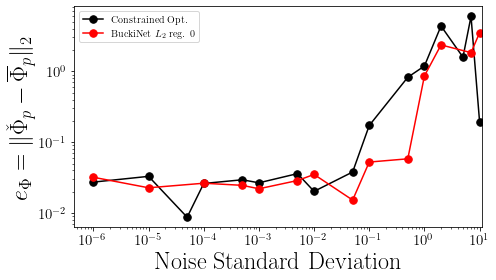

In [71]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(7, 4))
ax = fig.add_subplot(111)
ax.loglog(dataframe['params.noise_amp'][:-1], dataframe['error_sol'][:-1], 'k.-', markersize=15)
ax.loglog(b_dataframe['params.noise_amp'][:], b_dataframe['error_opt'][:], 'r.-', markersize=15)
# ax.loglog(b2_dataframe['params.noise_amp'][:], b2_dataframe['error_opt'][:], 'b.-', markersize=15)
ax.set_xlim([0, 11])
ax.legend(['Constrained Opt.', 'BuckiNet $L_2$ reg. 0','BuckiNet $L_2$ reg. 1e-6' ])
ax.set_xlabel('Noise Standard Deviation', fontsize=24)
ax.set_ylabel(r'$e_\Phi = \| \check{ \Phi}_p - \overline{ \Phi}_p\|_2$', fontsize=24)
plt.tight_layout()
plt.show()

fig.savefig('error_vs_noise.pdf')



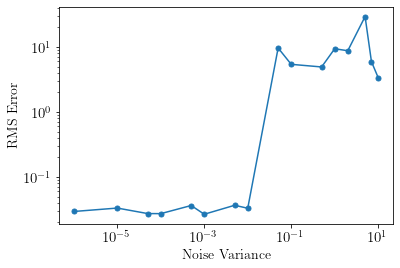

In [39]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.loglog(dataframe['params.noise_amp'][:-1], dataframe['error_opt'][:-1], '.-', markersize=10)
ax.set_xlabel('Noise Variance')
ax.set_ylabel('RMS Error')
# ax.set_xlim([1e-5, 11])
plt.show()